# Question 1 :
use the example notebook for ultra sound to open and render the images obtained from the lab.provide with a link to this notebook in your Github and screen shots of the image(s) rendered

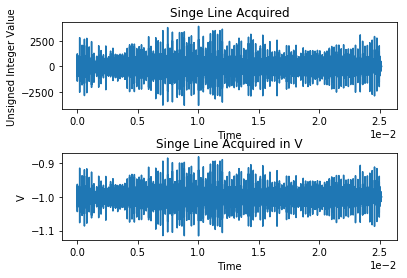

In [1]:
#we have first this command that initialize and matplotlib (library) for plotting and we specify that we want those plots inline in this notebook
%matplotlib inline

#now we import different packages that will allow to do math, lineal algebra, numerical operations, array operations and plotting
import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from scipy.signal import hilbert

#we use a simple open command for the file (basic Python)
f = open('LabRFdata.dat','rb')   # Windows
#we read it using a numpy (therefore the np.) command that allows direct reading from file into an array
Line = np.fromfile(f,count=-1,dtype=np.int16)
L=len(Line)
f.close() #close the file
#we will now populate an array for the time which we now is 1/125MHz step for a total of 15000
x=np.arange(0,L/20.83e6,1/20.83e6)  #start,stop,step
#now we plot only the first line acquired (15000 samples)
plt.subplots_adjust( hspace = .5 )
plt.subplot(211)
plt.plot(x,Line[:L])
plt.title('Singe Line Acquired')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#But this is in integers, in volts we need to calculate 2Vpp -> 65535=1V and 0=-1V
LineF=Line.astype(np.float64)
LineF/=(2**15-1)
LineF-=1.
plt.subplot(212)
plt.plot(x,LineF[:L])
plt.title('Singe Line Acquired in V')
plt.xlabel('Time')
plt.ylabel('V')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# Question 2:
what is the frequency observed in your signal?

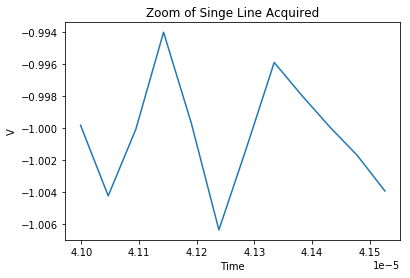

In [2]:
inx1=np.where(x>0.40993e-4)
inx1=inx1[0]
inx2=np.where(x>0.4156e-4)
inx2=inx2[0]
plt.plot(x[inx1[0]:inx2[0]],LineF[inx1[0]:inx2[0]])
plt.title('Zoom of Singe Line Acquired')
plt.xlabel('Time')
plt.ylabel('V')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

Since 1.5 cycles of the signal are between $0.40993\times 10^{-4}$ and $0.4156\times ^{-4}$ we then have a frequency of $\frac{1}{(0.40993\times 10^{-4}-0.4156\times 10^{-4})/1.5}=2.6MHz$

We will now obtain this using DFT. Note: just as we did before, we will take away the dc component!

The maximum is 0.000082 and it is found at index 125312 which is the frequency 4.978655e+06


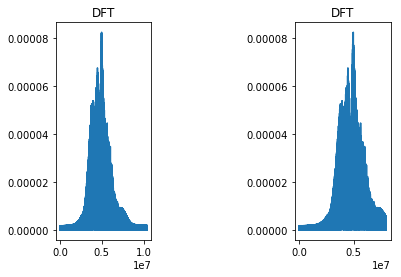

In [3]:
#Eliminating dc
LineF-=np.mean(LineF)
#Now let's obtain the spectrum
#the frequencies after fft will be between 0 and 1/2 of the sampling frequency
f=np.arange(0,20.83e6/2,20.83e6/L)
Y=np.fft.fft(LineF)
Pyy=abs(Y)/L
#note: we are showing just L/2 elements which are the positive frequencies and we are normalizing

#preparing the plotting
plt.subplots_adjust( wspace = 1.5 )
plt.subplot(121)
L2=len(Pyy)/2

plt.plot(f[:L2], Pyy[:L2])
plt.title('DFT')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

#Zooming into just less than 8MHz
inx=np.where(f>8e6)
inx=inx[0]
plt.subplot(122)
plt.plot(f[:inx[0]], Pyy[:inx[0]])
plt.title('DFT')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

#Let's obtain the frequency at which the maximum is observed
#Remember we have a DFT which is mirrored, so we only work with half
PyyM=Pyy[:L2]
mm=np.argmax(PyyM) #this gives the index where the max is found
print("The maximum is %f and it is found at index %d which is the frequency %e" % (max(PyyM),mm,f[mm]))

# Question 3:
What is the bandwidth observed in your signal?

The maximum is 0.000082 and it is found at index 125312 which is the frequency 2.987671e+07 one definition of band width is the transmission of data and also known as the range of frequencies within a given band, in particular that used for transmitting a signal.A less strict and more practically useful definition will refer to the frequencies beyond which frequency response is small less than 3dBbelow the maximum value or more rarely 10 dB below

# Question 4 :
 What is the difference in the images obtained using different acquisition parameters?  Explain the physical reasons for these differences

# Answer 4 :
Image look like a renderd image all edges and number of pixels and bits allocated gives us all information of the image which is rendered and all qcquistion parameter gives us information about image 
0028, 0010) Rows                                US: 120
(0028, 0011) Columns                             US: 128
(0028, 0034) Pixel Aspect Ratio                  IS: ['4', '3']
(0028, 0100) Bits Allocated                      US: 8
(0028, 0101) Bits Stored                         US: 8
(0028, 0102) High Bit                            US: 7
(0028, 0103) Pixel Representation                US: 0
(7fe0, 0000) Group Length                        UL: 122892
(7fe0, 0010) Pixel Data                          OB: Array of 122880 bytes

# Question 5:
A DICOM  le is provided on GitHub under the name US-Mono-2-8-8x-execho.dcm from anultrasound machine.  Modify the DICOM notebook from the course to open this  le.  Explainany modi cations on the code you needed to make to render the image.  Provide a snap shotof the image rendered.  Note:  remember ultrasound will have multiple images in one singleDICOM (multiple frames), open one frame only.

In [4]:
%matplotlib inline
from skimage import novice, data, io, exposure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import dicom
import os

#it is possible that in some installations pyDICOM won't be available in which case you will have to install it through pip

# Get file
RefDs = dicom.read_file('US-MONO2-8-8x-execho.dcm')
# Let's print all the Metadata here
print(RefDs)

(0008, 0000) Group Length                        UL: 342
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'TTE', '0001']
(0008, 0016) SOP Class UID                       UI: Ultrasound Multi-frame Image Storage
(0008, 0018) SOP Instance UID                    UI: 999.999.2.19941105.134500.2.101
(0008, 0020) Study Date                          DA: '1994.11.05'
(0008, 0023) Content Date                        DA: '1994.11.05'
(0008, 0030) Study Time                          TM: '13:45:00'
(0008, 0060) Modality                            CS: 'US'
(0008, 0070) Manufacturer                        LO: 'Acme Products'
(0008, 0090) Referring Physician's Name          PN: 'Anonymized'
(0008, 1030) Study Description                   LO: 'Exercise Echocardiogram'
(0008, 103e) Series Description                  LO: 'Post-Stress'
(0008, 2120) Stage Name                          SH: 'Post-Exercise'
(0008, 2122) Stage Number                        IS: '2'
(0008, 2124) Nu

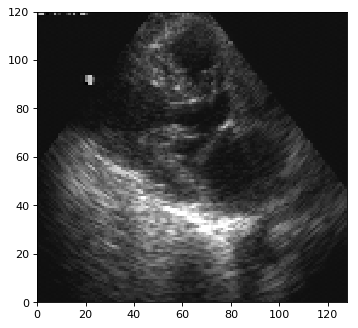

In [13]:
%matplotlib inline
from skimage import novice, data, io, exposure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import dicom
import os
ConstPixelDims = (int(RefDs.NumberofFrames),int(RefDs.Rows), int(RefDs.Columns))
ArrayDicom = np.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)
ds = dicom.read_file('US-MONO2-8-8x-execho.dcm')
ArrayDicom[:,:,:]=ds.pixel_array

fig = plt.figure(figsize=(5,5),dpi=80,facecolor='w',edgecolor='k')
plt.axes().set_aspect('equal') #this makes the image square
plt.set_cmap(plt.gray()) #grayscale
plt.pcolormesh(np.flipud(ArrayDicom[7,:,:]))


  # Question 6:
  Discuss what is the difference between the data you used to render your image and a DICOM?why do you think we use DICOM and not directly transfer data in this raw matter?

# Answer 6 :

DICOM bunches data into informational indexes. That implies that a document of x-ray image, for instance, really contains the patient ID inside the record, with the goal that the image can never be isolated from this data by mistake. This is like the way that picture arrangements, for example, JPEG can likewise have inserted labels to recognize and generally depict the picture. A DICOM information question comprises of various traits, including things, for example, name, ID, and so on., and furthermore one uncommon quality containing the image pixel information (i.e. coherently, the primary protest has no "header" all things considered, being simply a rundown of characteristics, including the pixel information). single DICOM question can have just a single quality containing pixel information. For some modalities, this relates to a solitary picture. 

Also, If we do render a image with the information, we wont have the capacity to separate every one of the information from that image. There will be constraint for bringing in the information. We won't have the capacity to store the definite report in the typical picture with specific points of interest. 

b-The Digital Imaging and Communications in Medicine (DICOM) Standard determines a non-restrictive information trade convention, computerized images configuration, and record structure for biomedical images and images related data. 

we utilize DICOM in light of the fact that DICOM utilizes three unique Data Element encoding plans, With Explicit Value Representation (VR) Data Elements. So our information will stay safe. what's more, we can remove that utilizing certain[2] 

# Question 7:

  Discuss  what  would  be  the  advantage/disadvantage(s)  of  using  raw  data  over  DICOM  in ultrasound?

# ANSWER 7 :
# Pros:
Raw images' typically are pixel-information as it were. 'Raw Dicom' is merchant particular. 

Raw DICOM is available in GE Cardiac Ultrasound machines, it's typically used to assess Strain utilizing 2 or 3D dot following in exclusive programming (Echo Pac). Non Raw images can't be utilized to assess Strain utilizing 2 or 3D spot following. 

"Raw DICOM" exists in advanced radiography, ultrasound. "Raw" ("for preparing") is adjusted for damaged pixels and levelness of the image, while "non-Raw" ("for introduction") are handled to look correspondingly to images (on radiographic film). 

E.g. in Raw images pixel esteems might be straightly corresponding to radiation measurements, in non-Raw not really. What's more, both are DICOM! Be that as it may, yet again, this is about ultrasound.[1] 

# Cons: 

All the more absolutely, RAW DICOM are encoded on 12bits without pressure, while "exemplary" DICOM pictures are by and large screenshots encoded on 8bits with jpeg misfortune pressure. Besides, RAW DICOM are not soaked for high esteems and not subject to tresholding for low esteems. For your inquiry concerning the sizes, the (physical) size of the pixels in not the same in the two organizations but rather I couldn't give you more points of interest.[1]

# Refrences :
1- Medical Images in DICOM. (n.d.). Digital Imaging and Communications in Medicine (DICOM), 85-111. doi:10.1007/978-3-540-74571-6_6

2- Bidgood, W. D., Horii, S. C., Prior, F. W., & Van Syckle, D. E. (1997). Understanding and Using DICOM, the Data Interchange Standard for Biomedical Imaging. Journal of the American Medical Informatics Association, 4(3), 199–212